In [1]:
!nvidia-smi

Fri Mar  8 06:26:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.6/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(1).download("yolov8")


mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...


In [6]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 112MB/s]
New https://pypi.org/project/ultralytics/8.1.24 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/treecnt-4/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer

In [7]:
!ls {HOME}/runs/detect/train/

args.yaml					    P_curve.png		train_batch136.jpg
confusion_matrix_normalized.png			    PR_curve.png	train_batch137.jpg
confusion_matrix.png				    R_curve.png		train_batch1.jpg
events.out.tfevents.1709879249.14346ae08028.2187.0  results.csv		train_batch2.jpg
F1_curve.png					    results.png		val_batch0_labels.jpg
labels_correlogram.jpg				    train_batch0.jpg	val_batch0_pred.jpg
labels.jpg					    train_batch135.jpg	weights


/content


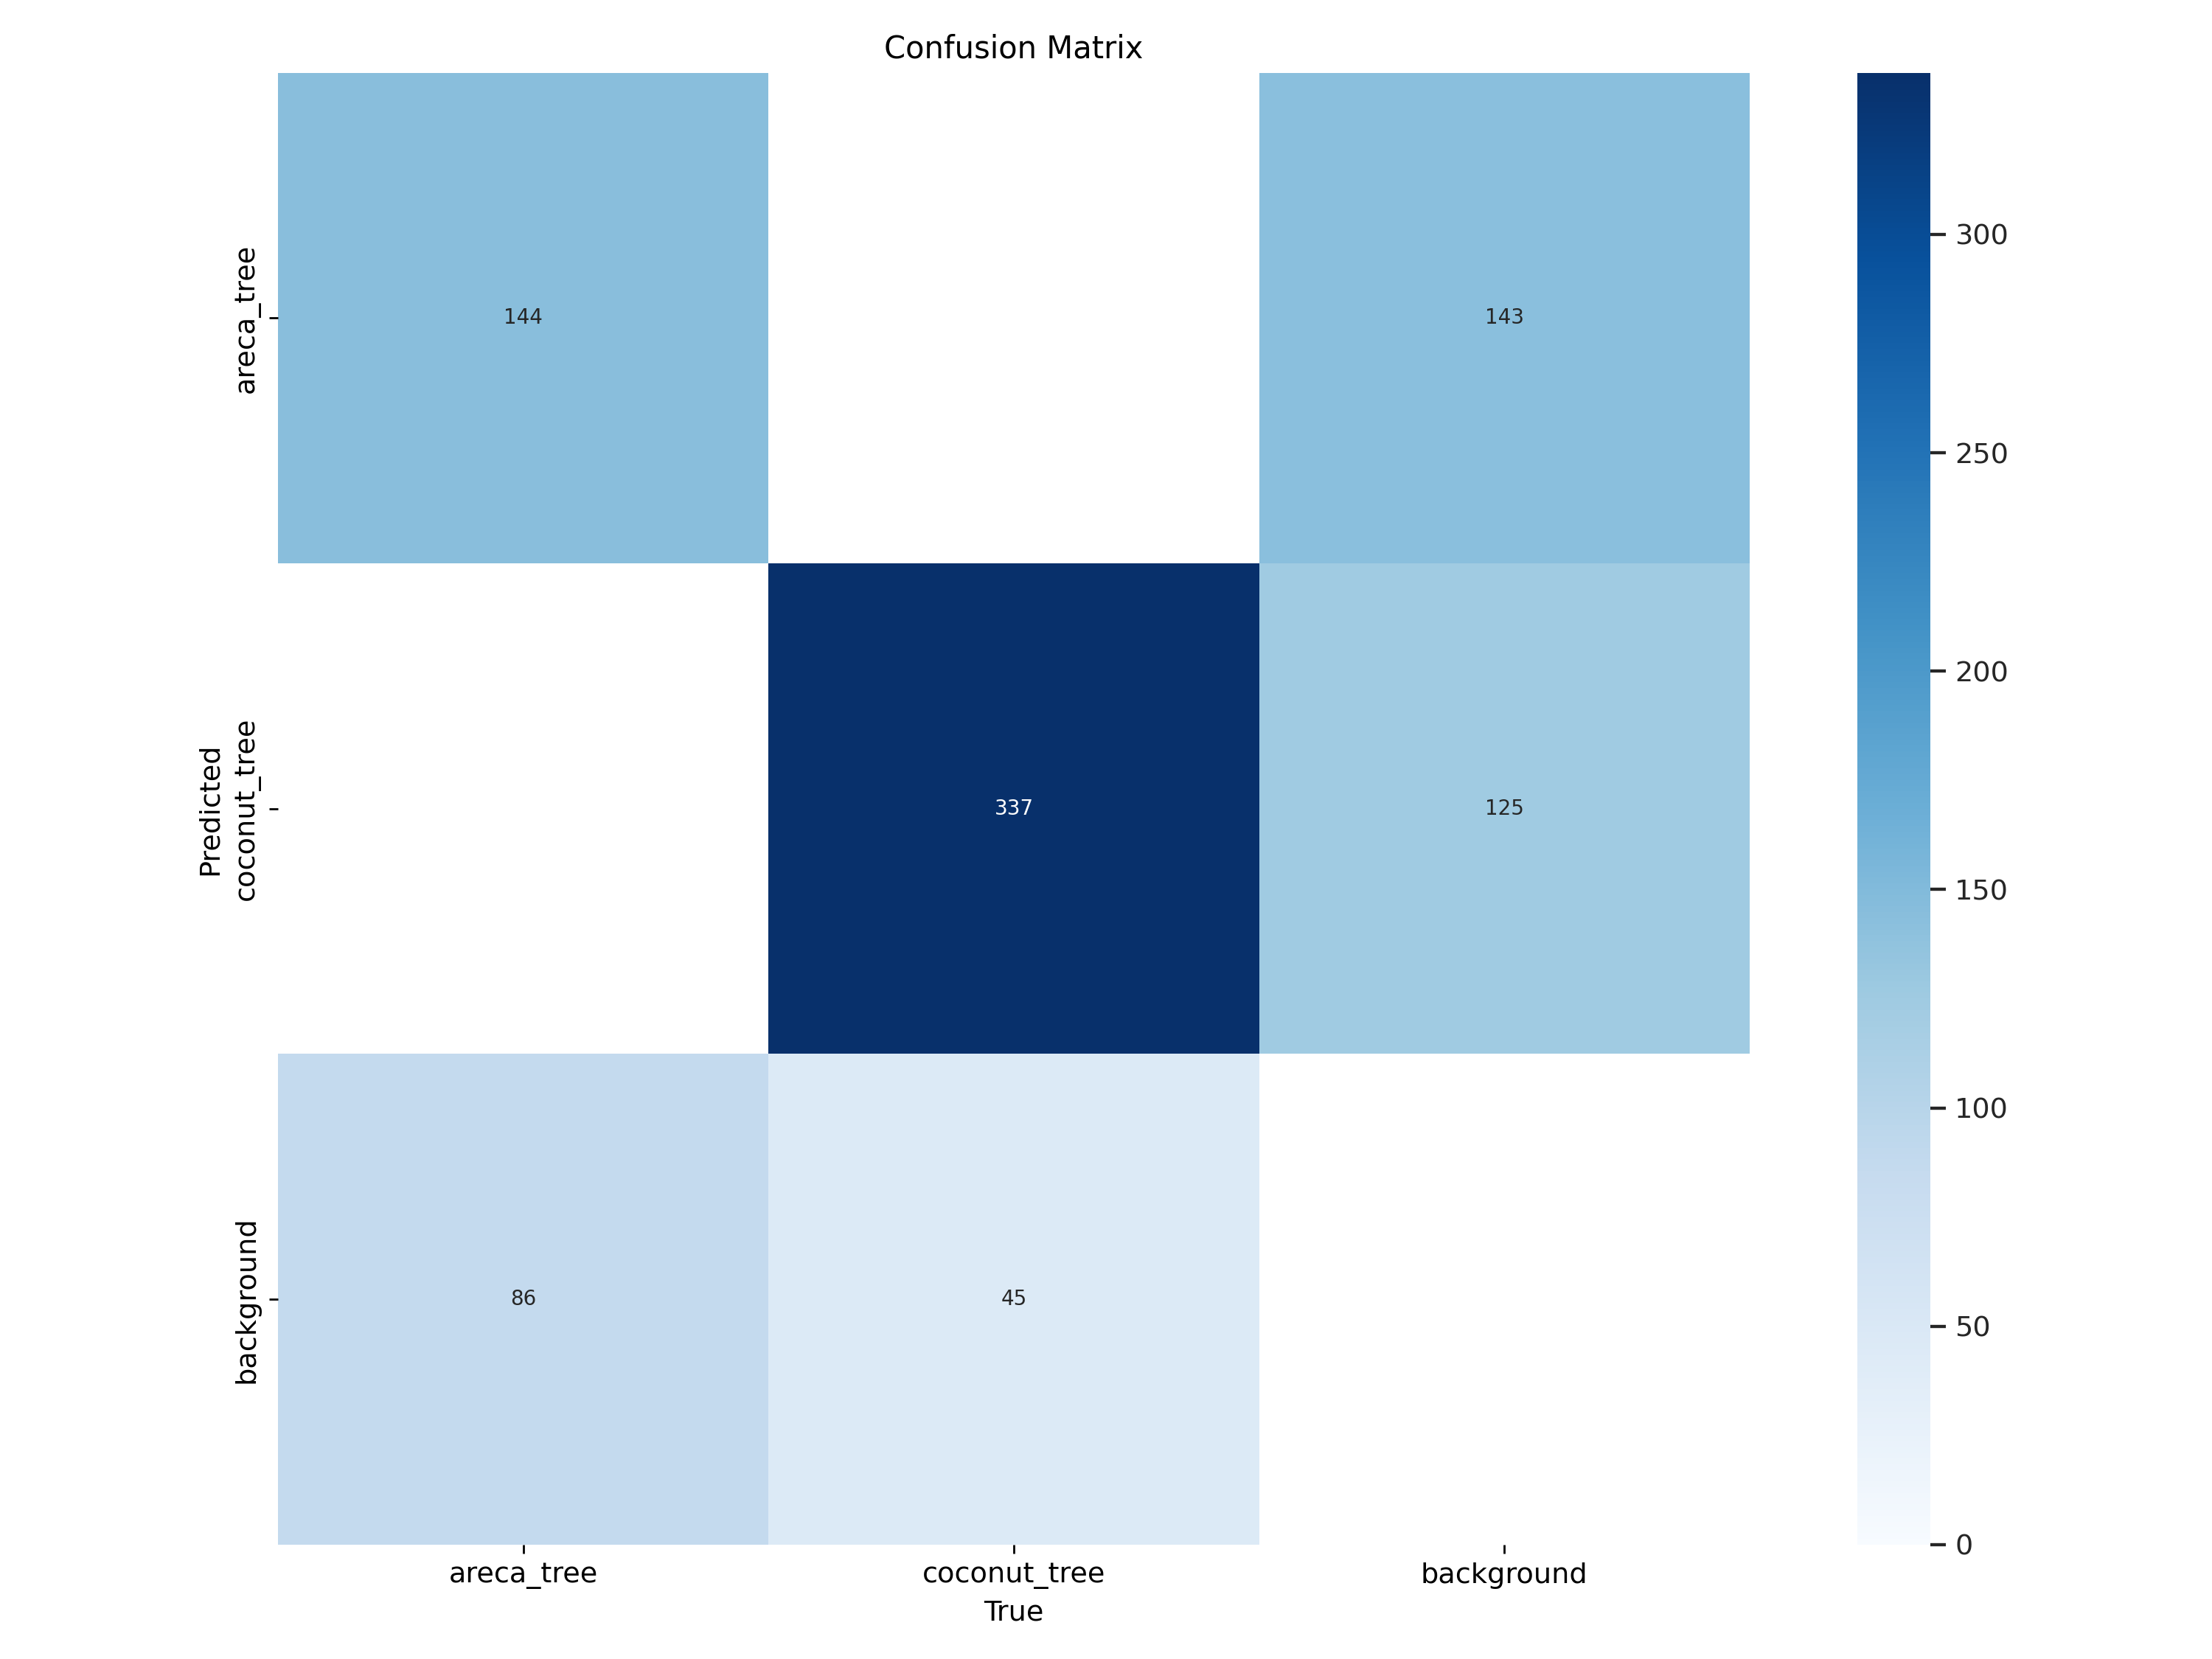

In [8]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


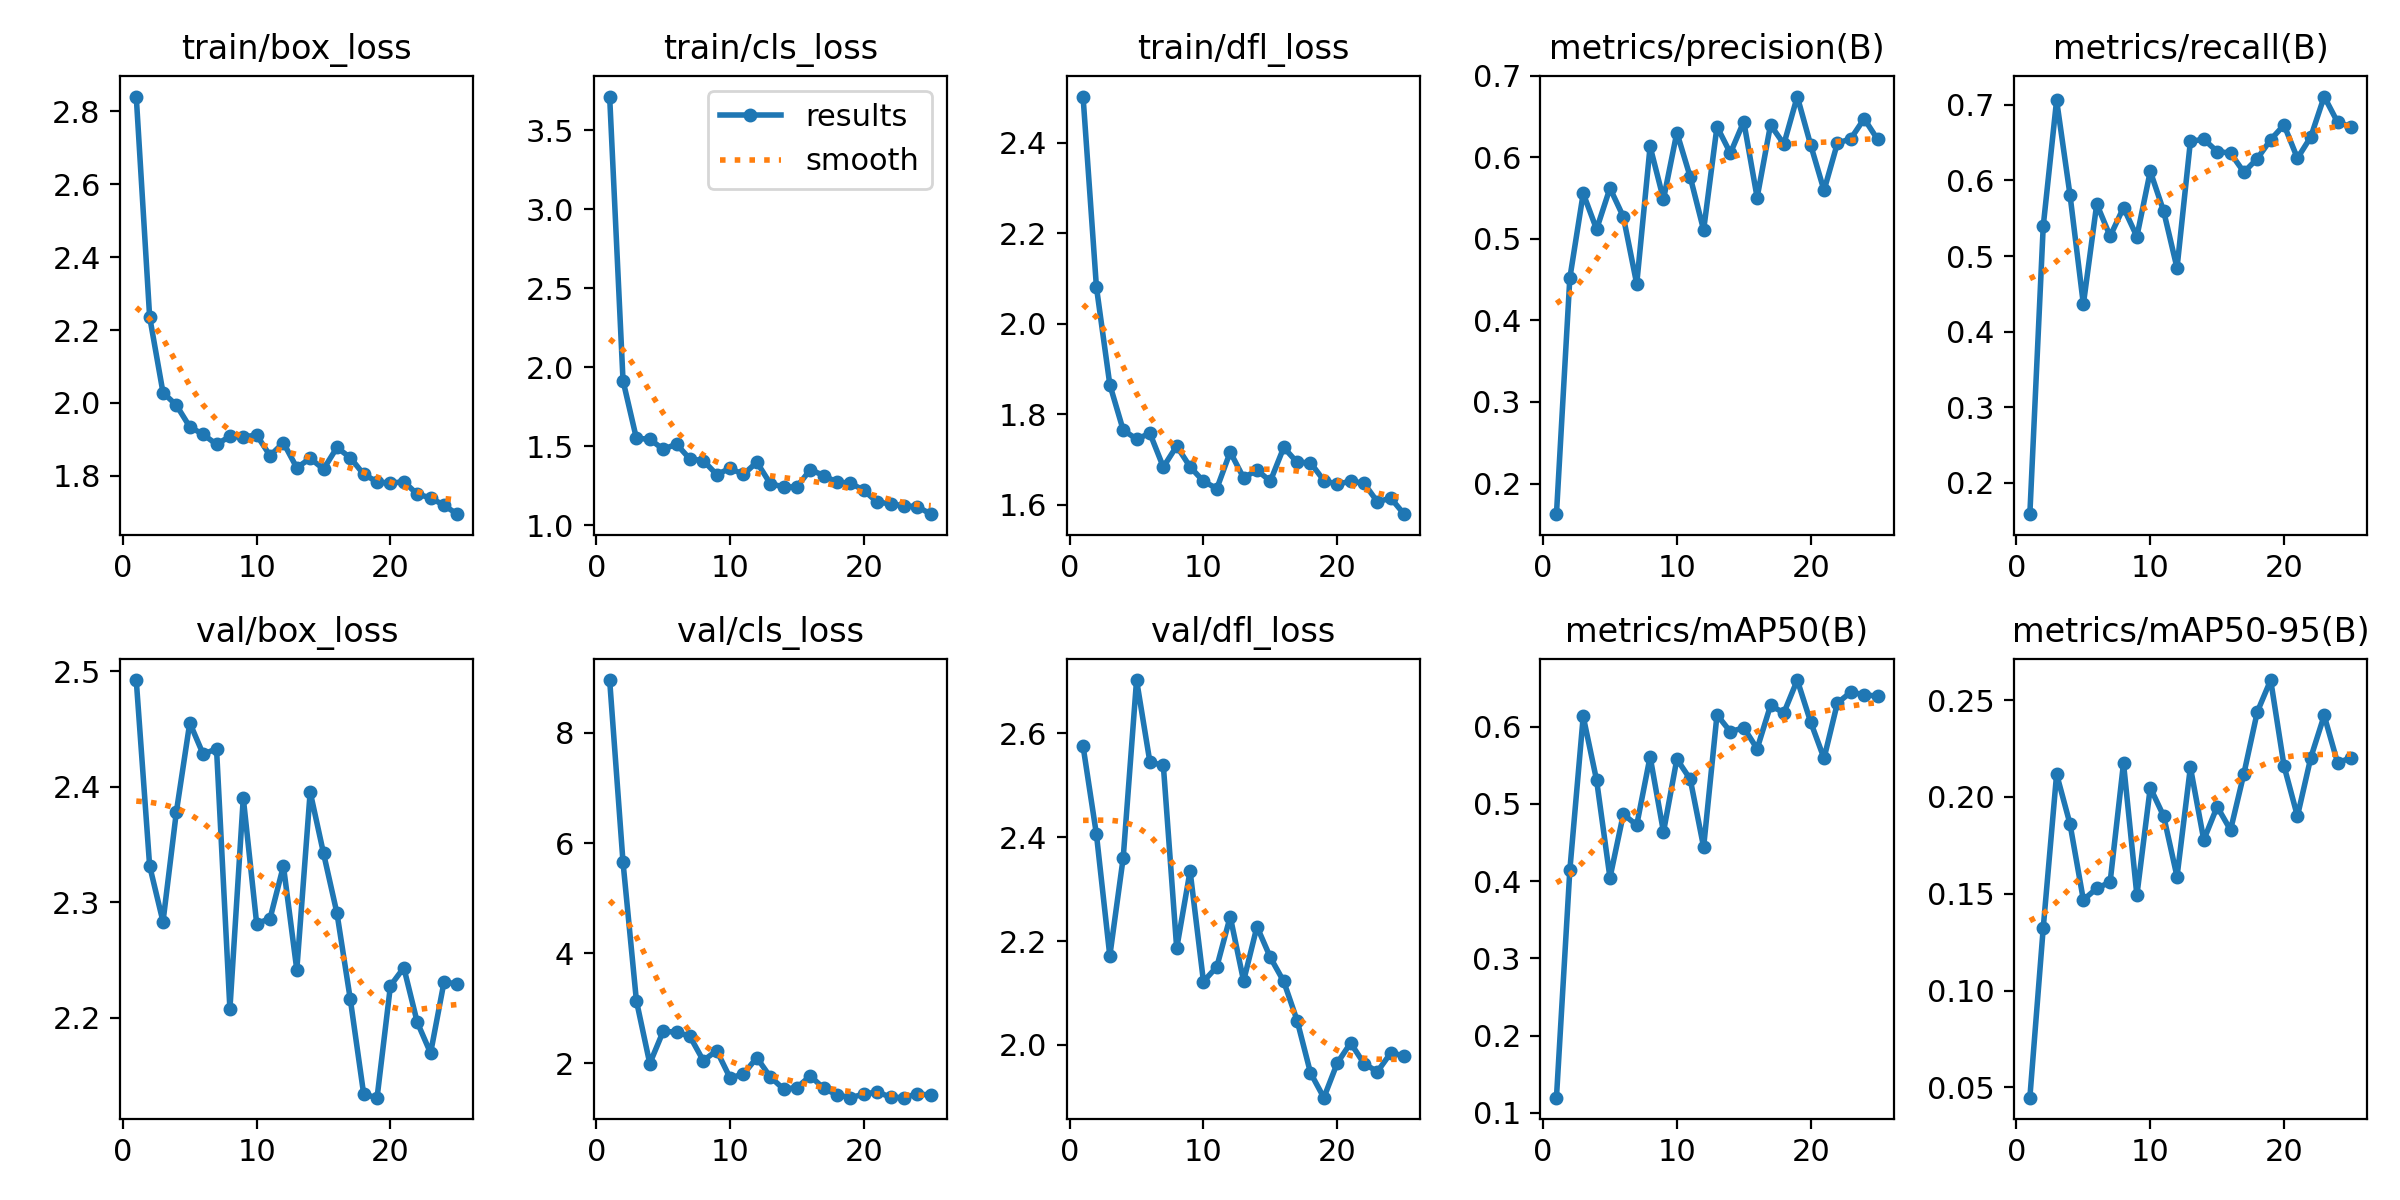

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


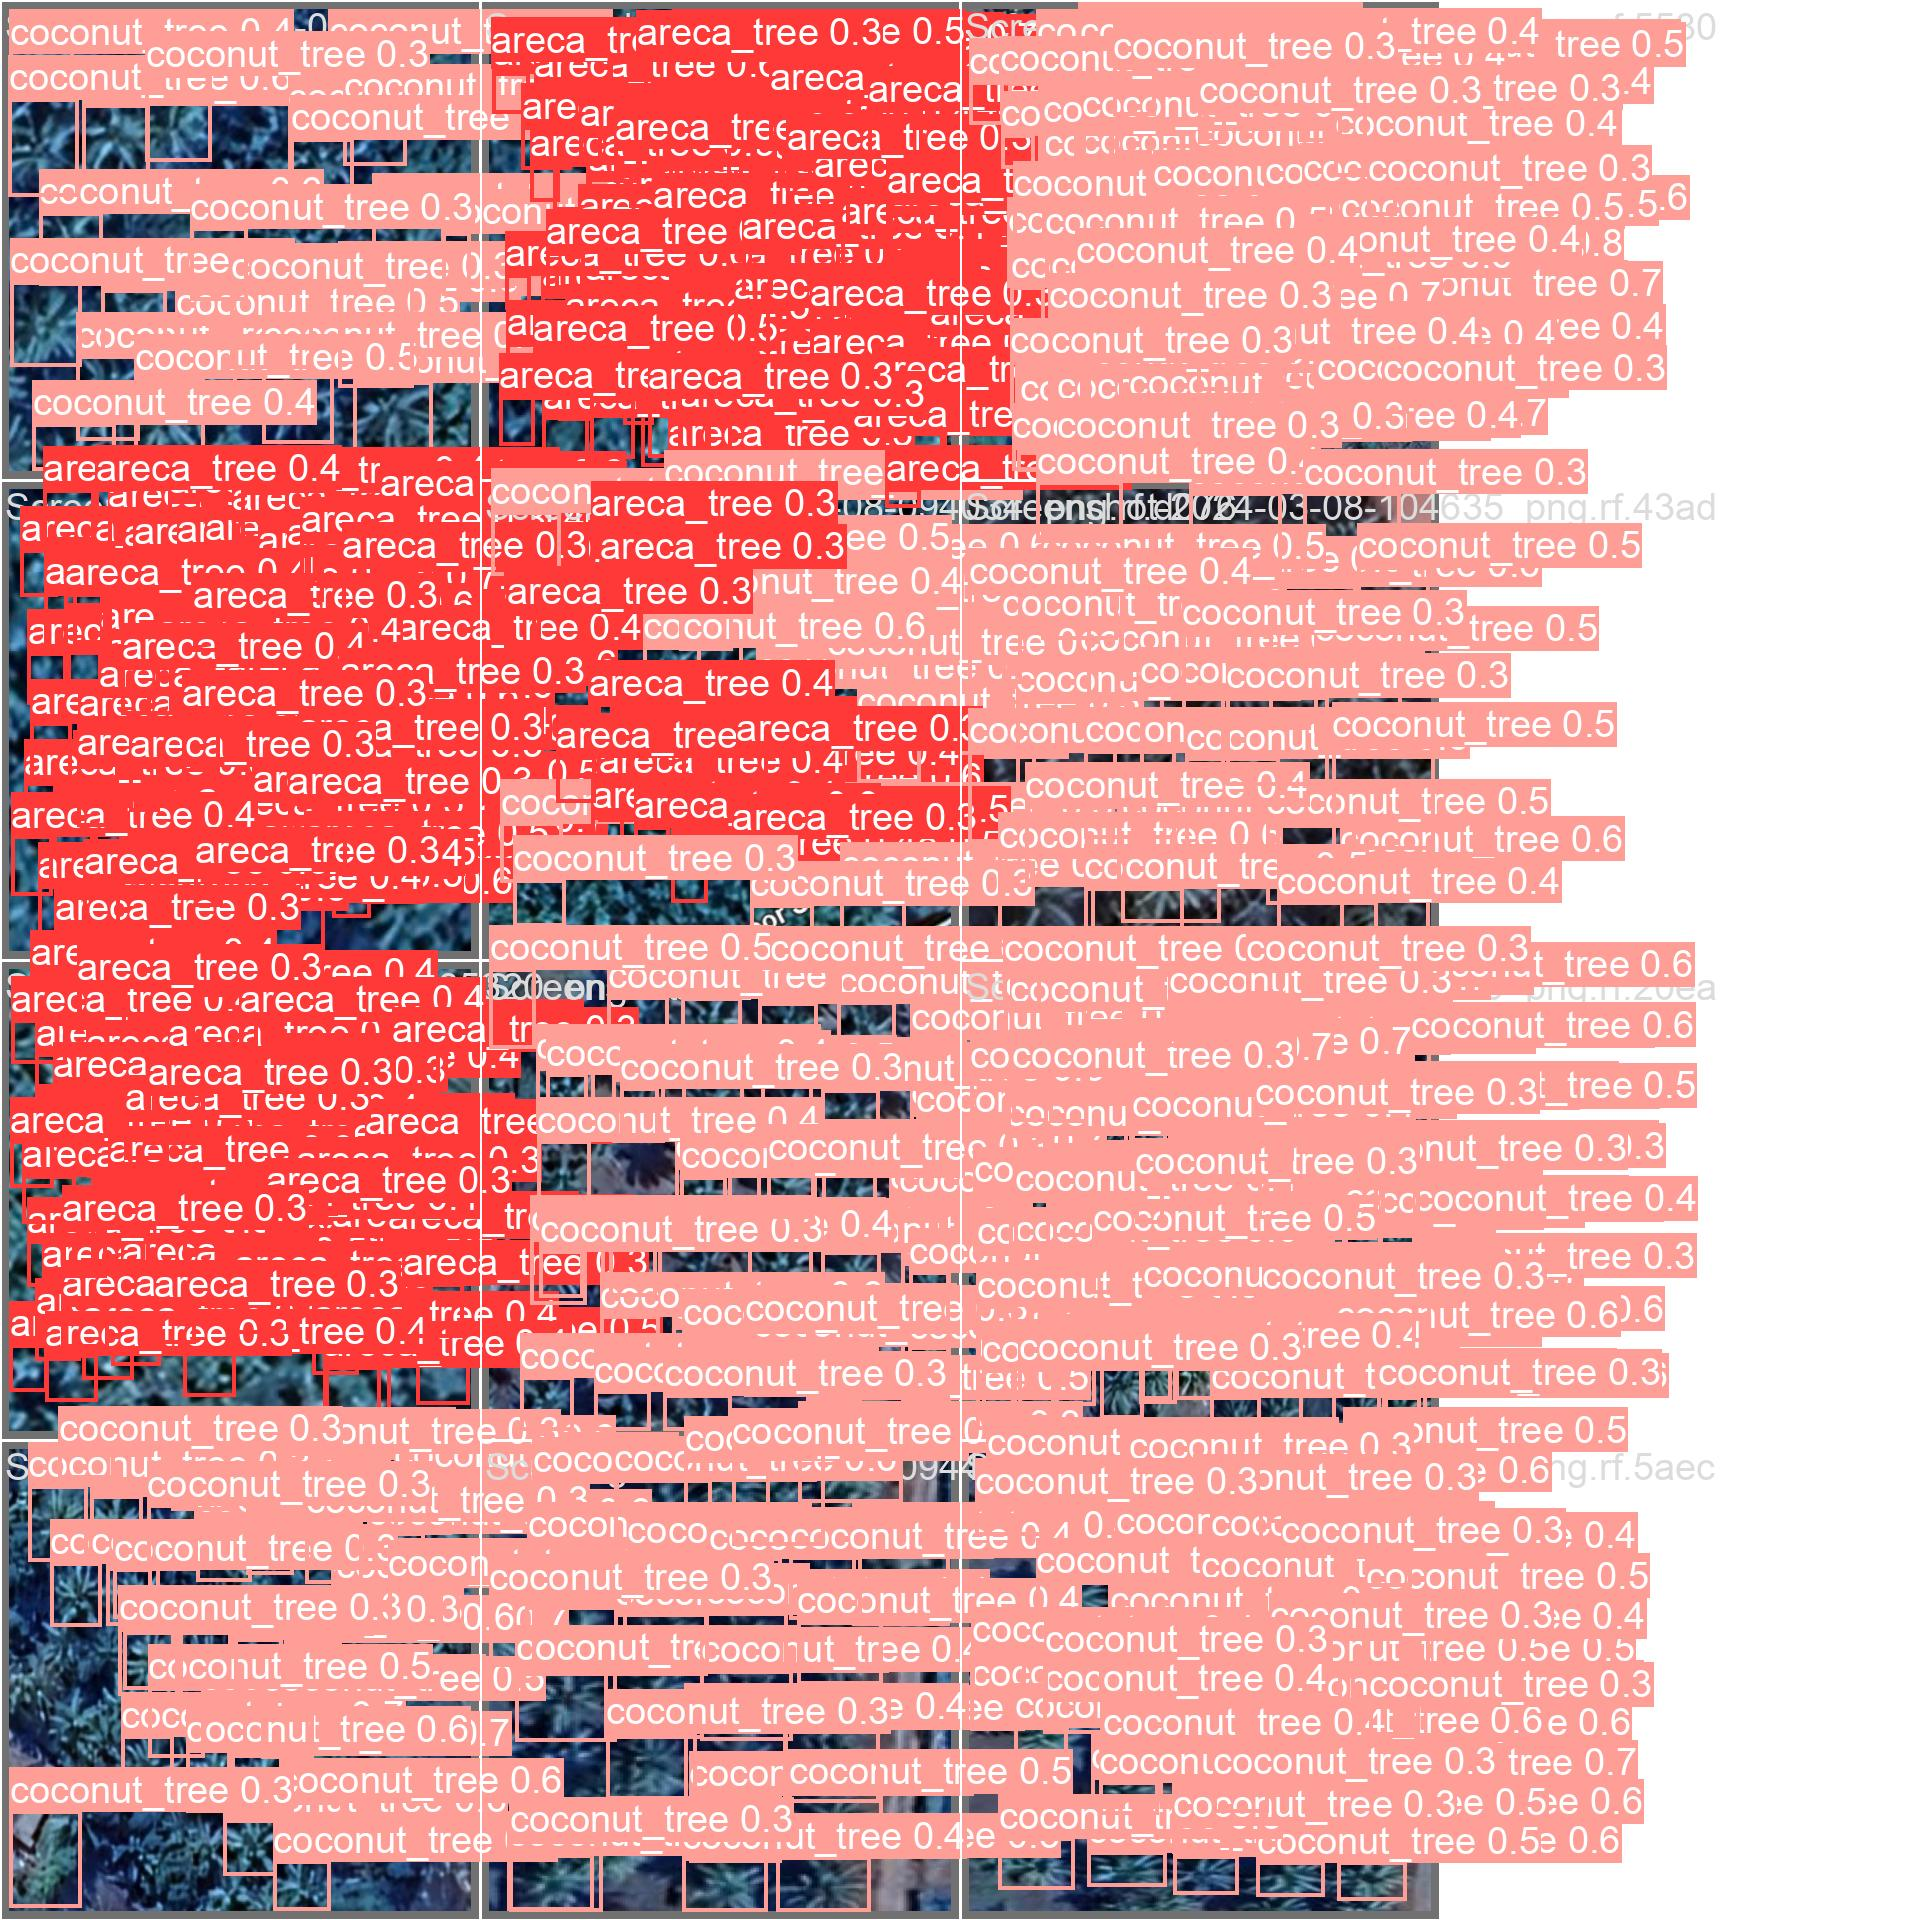

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/treecnt-4/valid/labels.cache... 12 images, 0 backgrounds, 0 corrupt: 100% 12/12 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:01<00:00,  1.46s/it]
                   all         12        612      0.675      0.655       0.66      0.261
            areca_tree         12        230       0.54      0.522      0.477      0.154
          coconut_tree         12        382      0.809      0.788      0.844      0.368
Speed: 0.4ms preprocess, 24.6ms inference, 0.0ms loss, 52.4ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/6 /content/datasets/treecnt-4/test/images/Screenshot-2024-03-07-170501_png.rf.7ce19fbdbbc73f3299d7187fd27bb88f.jpg: 800x800 30 areca_trees, 11 coconut_trees, 22.5ms
image 2/6 /content/datasets/treecnt-4/test/images/Screenshot-2024-03-08-094017_png.rf.08a8a9f4c4bfb79fe5963391a50f1f16.jpg: 800x800 27 areca_trees, 8 coconut_trees, 22.5ms
image 3/6 /content/datasets/treecnt-4/test/images/Screenshot-2024-03-08-094058_png.rf.9105142f2b39c0cbbb1e44d2af5443df.jpg: 800x800 15 areca_trees, 13 coconut_trees, 22.4ms
image 4/6 /content/datasets/treecnt-4/test/images/Screenshot-2024-03-08-094109_png.rf.f78fc14a1a69f643a5d9c598851b34ef.jpg: 800x800 68 areca_trees, 6 coconut_trees, 22.4ms
image 5/6 /content/datasets/treecnt-4/test/images/Screenshot-2024-03-08-094230_png.rf.157fc59778d8cffd6b1505a16600d99a.jpg: 800x800

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [14]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/tree-count/treecnt/4
Share your model with the world at: https://universe.roboflow.com/tree-count/treecnt/model/4


In [30]:
import json
data={
  "predictions": [
    {
      "x": 184.5,
      "y": 251.5,
      "width": 57,
      "height": 55,
      "confidence": 0.841,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "dbd581e3-dd73-47c6-868c-6f68373cf937"
    },
    {
      "x": 48.5,
      "y": 394,
      "width": 53,
      "height": 54,
      "confidence": 0.816,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "d1fe4ec0-00a4-4785-bb08-42cf4b508298"
    },
    {
      "x": 318.5,
      "y": 337,
      "width": 55,
      "height": 52,
      "confidence": 0.79,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "5bb5a17b-2f9a-41ca-bead-de801bf645d2"
    },
    {
      "x": 323,
      "y": 123.5,
      "width": 56,
      "height": 53,
      "confidence": 0.788,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "bd400e38-dd42-41b1-8f85-101264795564"
    },
    {
      "x": 194,
      "y": 124.5,
      "width": 62,
      "height": 59,
      "confidence": 0.776,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "95a689f0-494d-45a0-8479-478989857d20"
    },
    {
      "x": 85.5,
      "y": 189.5,
      "width": 65,
      "height": 65,
      "confidence": 0.775,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "cdc3978e-ca96-4578-8ffa-008d73bce658"
    },
    {
      "x": 320,
      "y": 54,
      "width": 64,
      "height": 64,
      "confidence": 0.763,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "3a271e60-d708-44d8-a211-7cc9438b9ad7"
    },
    {
      "x": 113,
      "y": 451,
      "width": 54,
      "height": 48,
      "confidence": 0.76,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "612164c1-6540-4564-8b5a-e1c204b8d5f1"
    },
    {
      "x": 146.5,
      "y": 73,
      "width": 53,
      "height": 56,
      "confidence": 0.753,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "2bf28499-bd04-419b-a22a-bd31a15cef30"
    },
    {
      "x": 438.5,
      "y": 264,
      "width": 61,
      "height": 56,
      "confidence": 0.751,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "d4b12879-a089-422d-b65f-0a632d00e7f1"
    },
    {
      "x": 254.5,
      "y": 90,
      "width": 57,
      "height": 54,
      "confidence": 0.743,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "3b365dfe-376a-4278-b66e-45f60186deda"
    },
    {
      "x": 303.5,
      "y": 480,
      "width": 57,
      "height": 58,
      "confidence": 0.742,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "d4408373-440d-49f0-a8cd-08d764f530dc"
    },
    {
      "x": 377.5,
      "y": 94,
      "width": 55,
      "height": 56,
      "confidence": 0.741,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "458eae01-82b8-4bd4-b7ef-c976fb787f03"
    },
    {
      "x": 86,
      "y": 116,
      "width": 54,
      "height": 52,
      "confidence": 0.741,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "26ae482b-d05c-44aa-95b3-f9d60f46708e"
    },
    {
      "x": 445.5,
      "y": 124,
      "width": 53,
      "height": 56,
      "confidence": 0.736,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "842c3bf2-eabc-49bc-a5dc-6a5860815f80"
    },
    {
      "x": 451.5,
      "y": 410.5,
      "width": 55,
      "height": 53,
      "confidence": 0.734,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "11db15ef-55aa-46e4-8a5c-f174f8a31f1a"
    },
    {
      "x": 43.5,
      "y": 468.5,
      "width": 51,
      "height": 57,
      "confidence": 0.729,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "8b09dbac-f06c-49e0-ad1b-b74314055867"
    },
    {
      "x": 251,
      "y": 294.5,
      "width": 54,
      "height": 49,
      "confidence": 0.729,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "79f82f59-6b07-4b2e-8409-63877b0b7567"
    },
    {
      "x": 313.5,
      "y": 258.5,
      "width": 51,
      "height": 49,
      "confidence": 0.727,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "37a4a198-5aba-410b-b0db-15f912ff4879"
    },
    {
      "x": 257,
      "y": 25.5,
      "width": 62,
      "height": 51,
      "confidence": 0.725,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "e76d43d2-fba6-4156-96cd-4f38e9073b18"
    },
    {
      "x": 374,
      "y": 164,
      "width": 50,
      "height": 64,
      "confidence": 0.724,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "44ce2344-cfb5-4c33-9cc6-04801c8a5c9b"
    },
    {
      "x": 376.5,
      "y": 308.5,
      "width": 55,
      "height": 53,
      "confidence": 0.723,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "a9c195b3-1e29-4be2-81f5-6ac8a865a3a1"
    },
    {
      "x": 438,
      "y": 54.5,
      "width": 54,
      "height": 53,
      "confidence": 0.715,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "6cc77ff7-8897-44da-a207-5b459c6b46e3"
    },
    {
      "x": 239,
      "y": 441,
      "width": 56,
      "height": 48,
      "confidence": 0.714,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "80f0ad00-3a25-4b5f-81e1-cfdd89513375"
    },
    {
      "x": 251.5,
      "y": 153,
      "width": 59,
      "height": 60,
      "confidence": 0.688,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "22f4cb31-80ac-4db8-beef-0c975bc37577"
    },
    {
      "x": 124.5,
      "y": 354,
      "width": 53,
      "height": 54,
      "confidence": 0.667,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "cea87581-943a-41cb-833e-4a133099dad0"
    },
    {
      "x": 381,
      "y": 23.5,
      "width": 56,
      "height": 47,
      "confidence": 0.666,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "43f5f5d8-1230-4b9b-ada7-ce5ed517d3d4"
    },
    {
      "x": 373,
      "y": 453,
      "width": 54,
      "height": 50,
      "confidence": 0.657,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "4cdb9ab5-a4fa-4b6a-b8ac-a5a26f227b61"
    },
    {
      "x": 21.5,
      "y": 212,
      "width": 43,
      "height": 50,
      "confidence": 0.656,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "af4ed197-8ea4-47c3-b581-e18fc7a58c72"
    },
    {
      "x": 432.5,
      "y": 191,
      "width": 57,
      "height": 52,
      "confidence": 0.65,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "ae4e7139-3842-4ecf-8144-4d888e73685a"
    },
    {
      "x": 148,
      "y": 18,
      "width": 70,
      "height": 36,
      "confidence": 0.634,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "dfbc8a74-7e15-4627-9da9-8e74ee8655aa"
    },
    {
      "x": 52,
      "y": 315.5,
      "width": 56,
      "height": 53,
      "confidence": 0.632,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "a115a89d-8e77-4643-88cb-bfd19fbbbdc6"
    },
    {
      "x": 252.5,
      "y": 215.5,
      "width": 55,
      "height": 57,
      "confidence": 0.632,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "bc86d240-2912-4633-ae4a-5d83419efc97"
    },
    {
      "x": 313.5,
      "y": 187.5,
      "width": 51,
      "height": 45,
      "confidence": 0.631,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "ceb9f2e6-45ab-4728-8521-b1da368ba058"
    },
    {
      "x": 188.5,
      "y": 187.5,
      "width": 57,
      "height": 55,
      "confidence": 0.588,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "38876f94-1f3e-4758-a4ae-3e1ccc344df9"
    },
    {
      "x": 457,
      "y": 338,
      "width": 58,
      "height": 46,
      "confidence": 0.576,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "94082bb0-6ab8-4d78-b251-a9cf8483bdda"
    },
    {
      "x": 139,
      "y": 157,
      "width": 52,
      "height": 62,
      "confidence": 0.574,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "fff5209c-43e6-4ac1-a4c1-d87d0548a585"
    },
    {
      "x": 24.5,
      "y": 132,
      "width": 49,
      "height": 70,
      "confidence": 0.567,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "d34147c8-45f0-44bd-b6a0-e134ac4289f8"
    },
    {
      "x": 84,
      "y": 29,
      "width": 54,
      "height": 54,
      "confidence": 0.556,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "74634ede-9b68-401f-8086-4b4208a8d1da"
    },
    {
      "x": 30.5,
      "y": 266.5,
      "width": 55,
      "height": 57,
      "confidence": 0.541,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "86a24498-5e13-42d5-ba2e-7ac2fca3d46b"
    },
    {
      "x": 170.5,
      "y": 324,
      "width": 59,
      "height": 54,
      "confidence": 0.509,
      "class": "coconut_tree",
      "class_id": 1,
      "detection_id": "0d2b68c2-a263-4842-a170-1876b18092fb"
    }
  ]
}
predictions_length = len(data["predictions"])
print("Total Trees:", predictions_length)
areca=0
coconut=0

for prediction in data["predictions"]:
    if prediction["class_id"] == 1:
      coconut+=1

    elif prediction["class_id"] == 0:
        areca+=1
print("\nNo. of arecanut tree:",areca)
print("\nNo. of coconut tree:",coconut)



Total Trees: 41

No. of arecanut tree: 0

No. of coconut tree: 41
